In [ ]:
# Clasificación de fármacos

# Dataset con datos de pacientes y el tipo de droga que se les debe aplicar según sus características.
# Objetivo de la práctica, predecir que fármaco se le debe suministrar a un nuevo paciente.

# Nota: En este dataset se habla de drogas pero se refiere a medicamentos.
# Target:   Drug - Drug Type (Rango: DrugY, DrugX, DrugA, DrugB, DrugC)

# Features: Age - Age of the Patient
#           Sex - Gender of the patients
#           BP - Blood Pressure Levels
#           Cholesterol - Cholesterol Levels
#           Na_to_K - Sodium to potassium Ration in Blood

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize

import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
drugs = pd.read_csv("/content/drug200.csv")
drugs.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
print("Nº total de Valores missing:", drugs.isnull().sum().sum())
for i in range(len(drugs.columns)):
    missing_data = drugs[drugs.columns[i]].isna().sum()
    if missing_data == 0:
      continue
    col_name = drugs.columns[i]
    perc = missing_data / len(drugs) * 100
    print('>%d\t Colunma: %s,\t Missing_Values: %d\t [%.2f%%]' % (i, col_name, missing_data, perc))

Nº total de Valores missing: 0


In [ ]:
#label_encoder = preprocessing.LabelEncoder()
#drugs['Drug'] = label_encoder.fit_transform(drugs['Drug'])

# Setear las características y la variable objetivo
y = drugs.Drug.values
drugs_X = drugs.drop('Drug', axis = 1)

# One-hot encoding
drugs_encoded = pd.get_dummies(drugs_X)

# Normalización
scaler = preprocessing.MinMaxScaler()
colmn_names = drugs_encoded.columns
data = scaler.fit_transform(drugs_encoded)
drugs_normalized = pd.DataFrame(data, columns=colmn_names)

# Evitamos la trampa de dummies
drugs_normalized = drugs_normalized.drop(['Sex_M', 'BP_NORMAL', 'Cholesterol_NORMAL'], axis = 1)
X = drugs_normalized.values

print(X)
print(y)
drugs_normalized.info()

[[0.13559322 0.59684783 1.         1.         0.         1.        ]
 [0.54237288 0.21339671 0.         0.         1.         1.        ]
 [0.54237288 0.12023891 0.         0.         1.         1.        ]
 ...
 [0.62711864 0.11335918 0.         0.         0.         1.        ]
 [0.13559322 0.24238539 0.         0.         0.         0.        ]
 [0.42372881 0.15885922 1.         0.         1.         0.        ]]
['DrugY' 'drugC' 'drugC' 'drugX' 'DrugY' 'drugX' 'DrugY' 'drugC' 'DrugY'
 'DrugY' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'drugX' 'drugA'
 'drugC' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugB' 'drugX' 'DrugY' 'drugX' 'drugX'
 'drugA' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugX' 'drugX'
 'drugX' 'drugA' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY'
 'drugB' 'drugC' 'drugB' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY'
 'drugX' 'drugB' 'DrugY' 'drugA' 'drugX' 'DrugY' 'DrugY' 'drugB' 'Dru

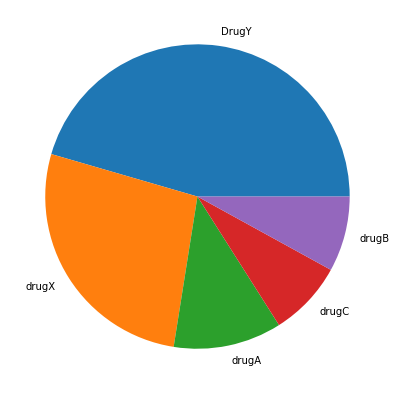

In [ ]:
drugs_label = drugs.Drug.value_counts().index
drugs_data = drugs.Drug.value_counts().values

fig = plt.figure(figsize =(10, 7))
plt.pie(drugs_data, labels = drugs_label)

plt.show()

# Como se puede comprobar, casi un 50% de las drogas aplicadas corresponde a la Y.

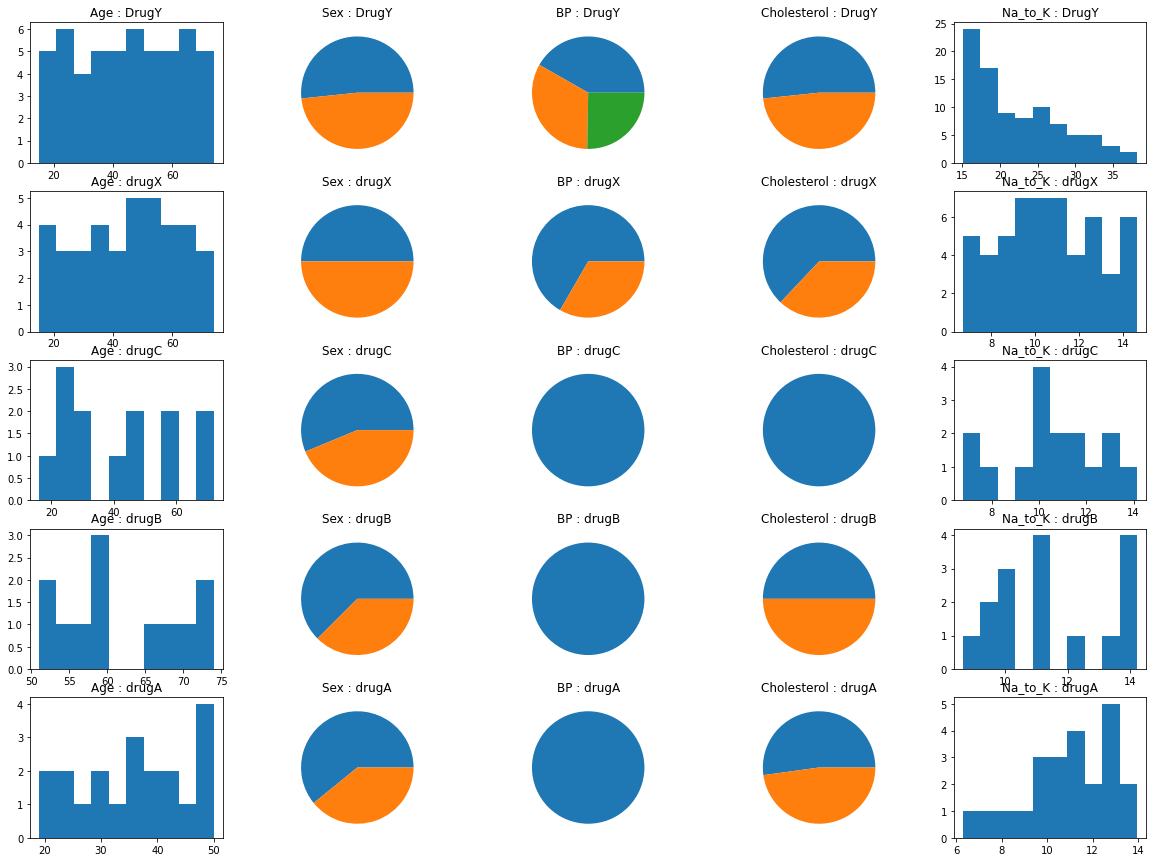

In [ ]:
# gráficas de densidad de los valores mas repetidos en el caso de cada droga
# que valores se repiten más para cada droga

figure, axis = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
classes = ['DrugY', 'drugX', 'drugC', 'drugB', 'drugA']
n_features = 5
n_classes = 5
f = 0 # filas
c = 0 # columnas

def hist_Age():
  return axis[f, c].hist(drugs.Age.where(drugs.Drug == classes[f]).value_counts().index)
def pie_Sex():
  return axis[f, c].pie(drugs.Sex.where(drugs.Drug == classes[f]).value_counts())
def pie_BP():
  return axis[f, c].pie(drugs.BP.where(drugs.Drug == classes[f]).value_counts())
def pie_Cholesterol():
  return axis[f, c].pie(drugs.Cholesterol.where(drugs.Drug == classes[f]).value_counts())
def hist_NatoK():
  return axis[f, c].hist(drugs.Na_to_K.where(drugs.Drug == classes[f]).value_counts().index)
action ={0:hist_Age, 1:pie_Sex, 2:pie_BP, 3:pie_Cholesterol, 4:hist_NatoK}

#action2 = {
#0:axis[f, c].hist(drugs.Age.where(drugs.Drug == classes[f]).value_counts().index),
#1:axis[f, c].pie(drugs.Sex.where(drugs.Drug == classes[f]).value_counts()), # azul son mujeres / naranja son hombres
#2:axis[f, c].pie(drugs.BP.where(drugs.Drug == classes[f]).value_counts()), # azul es colesterol alto / naranja es colesterol bajo / verde es colesterol normal
#3:axis[f, c].pie(drugs.Cholesterol.where(drugs.Drug == classes[f]).value_counts()), # azul es colesterol alto / naranja es colesterol normal
#4:axis[f, c].hist(drugs.Na_to_K.where(drugs.Drug == classes[f]).value_counts().index) # densidad con matplotlib: pd.DataFrame(drugs.Na_to_K.where(drugs.Drug == 'DrugY').value_counts().index).plot(kind='density')
#    }

for e in range(n_features):
  f = 0
  for i in range(n_classes):

    action[c]()
    axis[f, c].set_title("{} : {}".format(features[c], classes[f]))

    f = f + 1
  c = c + 1

plt.show()

In [ ]:
# Se le suministra:
#Fármaco Y: Personas de entre 20-65 años, 50/50 mujeres y hombres, presiones de sangre parejas, colesterol un 50/50 y una alta concentración de sodio/potasio entre 15-25, pudiendo alcanzar hasta 35 en algunos casos.
#Fármaco X: Personas de entre 20-65 años, 50/50 mujeres y hombres, mayoritariamente con alta presión en sangre y de colesterol. Los datos de sodio/potasio se concentran entre 7-14.
#Fármaco C: Personas de entre 20-65 años, mayoritariamente mujeres con una alta presión en sangre y el colesterol alto. Los datos de sodio/potasio se concentran entre 9-13.
#Fármaco B: Mayores de entre 50-75 años, mayoritariamente mujeres con una alta presión en sangre, el colesterol no arroja datos relevantes y el sodio/potasio tampoco.
#Fármaco A: Personas de entre 20-50 años, mayoritariamente mujeres con una alta presión en sangre, con una concentración de sodio/potasio entre 10-14. El colesterol no arroja datos relevantes.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

LogisticRegression

In [125]:
# LogisticRegression
logisregression = LogisticRegression(random_state = 0)  
logisregression.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [126]:
y_pred_logisregression  = logisregression.predict(X_test)
print(y_pred_logisregression)
print(y_test)

cm_logisregression = confusion_matrix(y_test, y_pred_logisregression) 
print(cm_logisregression)

['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'drugA' 'DrugY' 'DrugY' 'DrugY'
 'drugX' 'drugX' 'DrugY' 'drugA' 'drugB' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugB' 'DrugY' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY']
['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY' 'DrugY' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 

KNeighborsClassifier

In [127]:
# KNeighborsClassifier
classifierK_NN = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifierK_NN.fit(X_train, y_train)

KNeighborsClassifier()

In [128]:
y_pred_K_NN  = classifierK_NN.predict(X_test) 
print(y_pred_K_NN)
print(y_test)

cm_K_NN = confusion_matrix(y_test, y_pred_K_NN) 
print(cm_K_NN)

['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'drugX' 'drugB' 'drugC' 'drugB' 'drugX'
 'drugX' 'drugA' 'DrugY' 'drugX' 'DrugY' 'drugX' 'DrugY' 'drugX' 'drugX'
 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'drugB'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugA' 'DrugY' 'DrugY' 'DrugY'
 'drugX' 'drugX' 'drugX' 'DrugY' 'drugB' 'drugX' 'drugB' 'drugA' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'drugX' 'drugX' 'drugB' 'DrugY' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'drugA']
['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY' 'DrugY' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 

Support Vector Machine for Classification (SVC) # LINEAL

In [129]:
# SVC Lineal
classifierSVCLinear = SVC(kernel = 'linear', probability=True, random_state = 0)
classifierSVCLinear.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [130]:
y_pred_SVC_Linear  = classifierSVCLinear.predict(X_test) 
print(y_pred_SVC_Linear)
print(y_test)

cm_SVC_Linear = confusion_matrix(y_test, y_pred_SVC_Linear) 
print(cm_SVC_Linear)

['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugX' 'drugX'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'drugB'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'drugX' 'DrugY' 'DrugY' 'drugB' 'DrugY' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugB' 'DrugY' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY']
['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY' 'DrugY' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 

Support Vector Machine for Classification (SVC) # NO LINEAL

In [131]:
# SVC No Lineal
classifierSVC = SVC(kernel = 'rbf', probability=True, random_state = 0)
classifierSVC.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [132]:
y_pred_SVC  = classifierSVC.predict(X_test) 
print(y_pred_SVC)
print(y_test)

cm_SVC = confusion_matrix(y_test, y_pred_SVC) 
print(cm_SVC)

['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'drugX' 'drugB' 'drugC' 'DrugY' 'drugX'
 'drugX' 'drugA' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugX' 'drugX'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'drugB'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'drugX' 'drugX' 'DrugY' 'drugB' 'drugX' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'drugX' 'drugX' 'drugB' 'DrugY' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY']
['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY' 'DrugY' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 

Naive Bayes (GaussianNB)

In [133]:
# GaussianNB
classifierNaiveBayes = GaussianNB()                              
classifierNaiveBayes.fit(X_train, y_train)

GaussianNB()

In [134]:
y_pred_NaiveBayes  = classifierNaiveBayes.predict(X_test) 
print(y_pred_NaiveBayes)
print(y_test)

cm_NaiveBayes = confusion_matrix(y_test, y_pred_NaiveBayes) 
print(cm_NaiveBayes)

['drugC' 'drugX' 'drugC' 'DrugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC'
 'drugX' 'drugA' 'DrugY' 'drugA' 'drugX' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'drugA' 'drugA' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugX' 'drugX'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'drugB'
 'drugX' 'drugC' 'drugA' 'drugX' 'drugA' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'drugX' 'DrugY' 'drugA' 'drugB' 'drugX' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'drugX' 'drugX' 'drugB' 'DrugY' 'DrugY' 'drugX'
 'DrugY' 'drugX' 'DrugY']
['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY' 'DrugY' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 

DecisionTreeClassifier

In [135]:
# DecisionTreeClassifier
classifierDecisionTree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifierDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [136]:
y_pred_DecisionTree  = classifierDecisionTree.predict(X_test) 
print(y_pred_DecisionTree)
print(y_test)

cm_DecisionTree = confusion_matrix(y_test, y_pred_DecisionTree) 
print(cm_DecisionTree)

['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY' 'DrugY' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugB' 'DrugY' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY']
['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY' 'DrugY' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 

RandomForestClassifier

In [137]:
# RandomForestClassifier
classifierRandomForest = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)   
classifierRandomForest.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [138]:
y_pred_RandomForest  = classifierRandomForest.predict(X_test) 
print(y_pred_RandomForest)
print(y_test)

cm_RandomForest = confusion_matrix(y_test, y_pred_RandomForest) 
print(cm_RandomForest)

['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY' 'DrugY' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugB' 'DrugY' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY']
['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY' 'DrugY' 'drugB' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 

EVALUACIÓN

In [139]:
# CONFUSION MATRIX
print("CONFUSION MATRIX")
print("CONF. MATRX. (Logistic Regression): " )
print( confusion_matrix(y_test, y_pred_logisregression) )
print(" ")
print("CONF. MATRX.  (K_Nearest_Neighbors): ")
print( confusion_matrix(y_test, y_pred_K_NN) )
print(" ")
print("CONF. MATRX.  (Support Vector Machine SVC Linear Kernel): ")
print( confusion_matrix(y_test, y_pred_SVC_Linear) )
print(" ")
print("CONF. MATRX.  (Support Vector Machine SVC RBF Kernel): ")
print( confusion_matrix(y_test, y_pred_SVC) )
print(" ")
print("CONF. MATRX.  (Naive Bayes): "  )
print( confusion_matrix(y_test, y_pred_NaiveBayes) )
print(" ")
print("CONF. MATRX.  (Classification Decision Tree): " )
print( confusion_matrix(y_test, y_pred_DecisionTree) )
print(" ")
print("CONF. MATRX.  (Classification Random Forests): " )
print( confusion_matrix(y_test, y_pred_RandomForest) )
print(" ")
print(" ")

# ACCURACY_SCORE
print("ACCURACY")
print("   ACC (Logistic Regression): %.2f" % accuracy_score(y_test, y_pred_logisregression) )
print("   ACC (K_Nearest_Neighbors): %.2f" % accuracy_score(y_test, y_pred_K_NN) )
print("   ACC (Support Vector Machine SVC Linear Kernel): %.2f" % accuracy_score(y_test, y_pred_SVC_Linear) )
print("   ACC (Support Vector Machine SVC RBF Kernel): %.2f" % accuracy_score(y_test, y_pred_SVC) )
print("   ACC (Naive Bayes): %.2f" % accuracy_score(y_test, y_pred_NaiveBayes) )
print("   ACC (Classification Decision Tree): %.2f" % accuracy_score(y_test, y_pred_DecisionTree) )
print("   ACC (Classification Random Forests): %.2f" % accuracy_score(y_test, y_pred_RandomForest) )
print(" ")

print("Para este caso concreto, SVC con kernel lineal [Linear Kernel] ha dado mejores resultados que el no lineal [RBF Kernel].")
print("")

# CLASSIFICATION_REPORT
print("CLASSIFICATION_REPORT")
print("CLSS_REPORT (Logistic Regression): " )
print( classification_report(y_test, y_pred_logisregression) )
print(" ")
print("CLSS_REPORT (K_Nearest_Neighbors): ")
print( classification_report(y_test, y_pred_K_NN) )
print(" ")
print("CLSS_REPORT (Support Vector Machine SVC Linear Kernel): ")
print( classification_report(y_test, y_pred_SVC_Linear) )
print(" ")
print("CLSS_REPORT (Support Vector Machine SVC RBF Kernel): ")
print( classification_report(y_test, y_pred_SVC) )
print(" ")
print("CLSS_REPORT (Naive Bayes): "  )
print( classification_report(y_test, y_pred_NaiveBayes) )
print(" ")
print("CLSS_REPORT (Classification Decision Tree): " )
print( classification_report(y_test, y_pred_DecisionTree) )
print(" ")
print("CLSS_REPORT (Classification Random Forests): " )
print( classification_report(y_test, y_pred_RandomForest) )
print(" ")

CONFUSION MATRIX
CONF. MATRX. (Logistic Regression): 
[[32  0  1  0  1]
 [ 1  4  0  0  0]
 [ 1  0  2  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 18]]
 
CONF. MATRX.  (K_Nearest_Neighbors): 
[[18  4  3  1  8]
 [ 2  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 6  0  0  0 14]]
 
CONF. MATRX.  (Support Vector Machine SVC Linear Kernel): 
[[29  0  2  0  3]
 [ 2  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 19]]
 
CONF. MATRX.  (Support Vector Machine SVC RBF Kernel): 
[[23  1  2  0  8]
 [ 2  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 19]]
 
CONF. MATRX.  (Naive Bayes): 
[[18  4  2  3  7]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 20]]
 
CONF. MATRX.  (Classification Decision Tree): 
[[34  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 19]]
 
CONF. MATRX.  (Classification Random Forests): 
[[34  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 19]]
 
 
ACCURACY
   ACC

['drugC' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugX' 'drugX' 'drugY'
 'drugX' 'drugA' 'drugY' 'drugY' 'drugY' 'drugB' 'drugC' 'drugY' 'drugY'
 'drugX' 'drugY' 'drugY' 'drugX' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'drugY' 'drugY'
 'drugX' 'drugY' 'drugA' 'drugX' 'drugY' 'drugA' 'drugY' 'drugX' 'drugY'
 'drugX' 'drugY' 'drugY' 'drugA' 'drugY' 'drugY' 'drugB' 'drugY' 'drugY'
 'drugC' 'drugY' 'drugX' 'drugX' 'drugY' 'drugB' 'drugY' 'drugY' 'drugX'
 'drugY' 'drugX' 'drugY']
[2 3 4 4 4 3 3 3 4 3 0 4 4 4 1 2 4 4 3 4 4 3 3 3 4 4 4 4 4 3 3 2 0 3 4 4 3
 4 0 3 4 0 4 3 4 3 4 4 0 4 4 1 4 4 2 4 3 3 4 1 4 4 3 4 3 4]
>DrugY: 0
>drugA: 1
>drugB: 2
>drugC: 3
>drugX: 4
#IMPORTANTE: Las filas están ordenadas del 0 al 4, siendo 0 (DrugY) la primera fila y 4 (drugX) la última.
y_prob_logisregression 	y_prob_KNN 		y_prob_SVCLinear 	y_prob_SVC 	y_prob_NaiveBayes 	y_prob_classifierTree 	y_prob_classifierRndForest


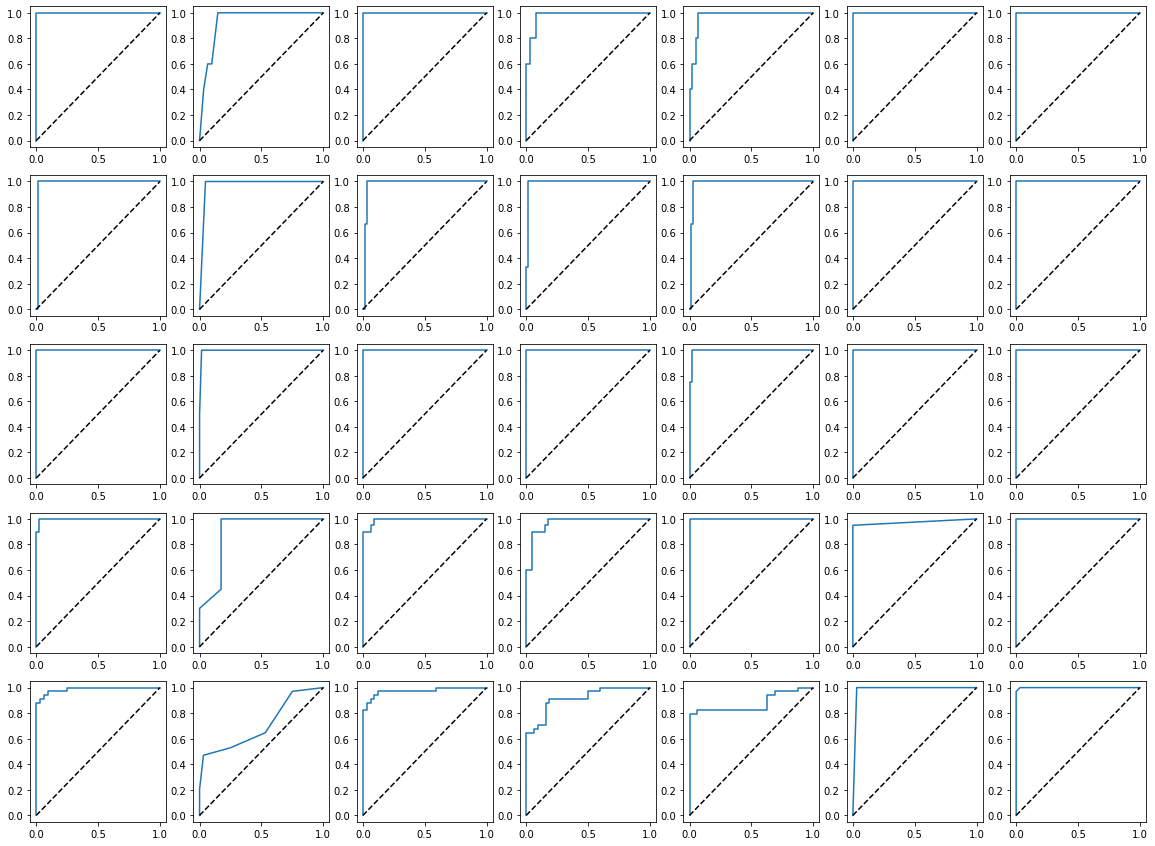

In [ ]:
label_encoder = preprocessing.LabelEncoder()

test_Y = label_encoder.fit_transform(y_test)
print(y_test)
print(test_Y)
print(">DrugY: 0" +
      "\n>drugA: 1" +
      "\n>drugB: 2" +
      "\n>drugC: 3" +
      "\n>drugX: 4")
print("#IMPORTANTE: Las filas están ordenadas del 0 al 4, siendo 0 (DrugY) la primera fila y 4 (drugX) la última.")
test_Y = label_binarize(test_Y, classes=[0,1,2,3,4])

n_classes = 5
n_algort = 7

algort = {'y_prob_logisregression': logisregression.predict_proba(X_test),
          'y_prob_KNN': classifierK_NN.predict_proba(X_test),
          'y_prob_SVCLinear': classifierSVCLinear.predict_proba(X_test),
          'y_prob_SVC': classifierSVC.predict_proba(X_test),
          'y_prob_NaiveBayes': classifierNaiveBayes.predict_proba(X_test),
          'y_prob_classifierTree': classifierDecisionTree.predict_proba(X_test),
          'y_prob_classifierRndForest': classifierRandomForest.predict_proba(X_test)}
#algort = []
#algort.append(logisregression.predict_proba(X_test))                            # y_prob_logisregression
#algort.append(classifierK_NN.predict_proba(X_test))                             # y_prob_KNN
#algort.append(classifierSVCLinear.predict_proba(X_test))                        # y_prob_SVCLinear
#algort.append(classifierSVC.predict_proba(X_test))                              # y_prob_SVC
#algort.append(classifierNaiveBayes.predict_proba(X_test))                       # y_prob_NaiveBayes
#algort.append(classifierDecisionTree.predict_proba(X_test))                     # y_prob_classifierTree
#algort.append(classifierRandomForest.predict_proba(X_test))                     # y_prob_classifierRndForest
print("y_prob_logisregression \ty_prob_KNN \t\ty_prob_SVCLinear \ty_prob_SVC \ty_prob_NaiveBayes \ty_prob_classifierTree \ty_prob_classifierRndForest")

fpr = dict()
tpr = dict()
roc_auc = dict()
figure, axis = plt.subplots(nrows=5, ncols=7, figsize=(20, 15))
f = 0 # filas
c = 0 # columnas

for e in range(n_algort):
  f = 0
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_Y[:, i], list(algort.values())[e][:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    axis[f, c].plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    axis[f, c].plot([0, 1], [0, 1], 'k--')
    
    f = f + 1
    
  c = c + 1
plt.show()

In [ ]:
# Evaluamos el rendimiento del modelo en el conjunto de entrenamiento
train_acc_lr = accuracy_score(y_train, logisregression.predict(X_train))
train_acc_kn = accuracy_score(y_train, classifierK_NN.predict(X_train))
train_acc_svc_linear = accuracy_score(y_train, classifierSVCLinear.predict(X_train))
train_acc_svc = accuracy_score(y_train, classifierSVC.predict(X_train))
train_acc_nb = accuracy_score(y_train, classifierNaiveBayes.predict(X_train))
train_acc_tree = accuracy_score(y_train, classifierDecisionTree.predict(X_train))
train_acc_rf = accuracy_score(y_train, classifierRandomForest.predict(X_train))

# Evaluamos el rendimiento del modelo en el conjunto de prueba
test_acc_lr = accuracy_score(y_test, logisregression.predict(X_test))
test_acc_kn = accuracy_score(y_test, classifierK_NN.predict(X_test))
test_acc_svc_linear = accuracy_score(y_test, classifierSVCLinear.predict(X_test))
test_acc_svc = accuracy_score(y_test, classifierSVC.predict(X_test))
test_acc_nb = accuracy_score(y_test, classifierNaiveBayes.predict(X_test))
test_acc_tree = accuracy_score(y_test, classifierDecisionTree.predict(X_test))
test_acc_rf = accuracy_score(y_test, classifierRandomForest.predict(X_test))

# Imprimimos los puntajes de precisión
print("LR: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_lr))
print("LR: Puntaje de precisión en prueba: {:.2f}".format(test_acc_lr))
print("")
print("KN: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_kn))
print("KN: Puntaje de precisión en prueba: {:.2f}".format(test_acc_kn))
print("")
print("SVC Linear: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_svc_linear))
print("SVC Linear: Puntaje de precisión en prueba: {:.2f}".format(test_acc_svc_linear))
print("")
print("SVC RBF: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_svc))
print("SVC RBF: Puntaje de precisión en prueba: {:.2f}".format(test_acc_svc))
print("")
print("NB: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_nb))
print("NB: Puntaje de precisión en prueba: {:.2f}".format(test_acc_nb))
print("")
print("TREE: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_tree))
print("TREE: Puntaje de precisión en prueba: {:.2f}".format(test_acc_tree))
print("")
print("RF: Puntaje de precisión en entrenamiento: {:.2f}".format(train_acc_rf))
print("RF: Puntaje de precisión en prueba: {:.2f}".format(test_acc_rf))

LR: Puntaje de precisión en entrenamiento: 0.93
LR: Puntaje de precisión en prueba: 0.91

KN: Puntaje de precisión en entrenamiento: 0.85
KN: Puntaje de precisión en prueba: 0.64

SVC Linear: Puntaje de precisión en entrenamiento: 0.91
SVC Linear: Puntaje de precisión en prueba: 0.86

SVC RBF: Puntaje de precisión en entrenamiento: 0.87
SVC RBF: Puntaje de precisión en prueba: 0.79

NB: Puntaje de precisión en entrenamiento: 0.72
NB: Puntaje de precisión en prueba: 0.76

TREE: Puntaje de precisión en entrenamiento: 1.00
TREE: Puntaje de precisión en prueba: 0.98

RF: Puntaje de precisión en entrenamiento: 0.99
RF: Puntaje de precisión en prueba: 0.98


In [146]:
# Los arboles de clasificación son los que mejores resultados han dado tanto con los datos de entrenamiento COMO LOS DE PRUEBA.
# Por lo que se entiende que son capaces de generalizar bien.
# En un tercer puesto estaría la regresión logística.
# Y ya por último, el resto de algoritmos. Los cuales tienen resultados muy disparejos entre los datos de prueba y entrenamiento, por lo que no lo han hecho bien.
# El que menos mal ha salido sería las máquinas de soporte vectorial, las cuales lo han hecho mas o menos bien pero no tan bien como esperaba. Teniendo una puntuación por debajo de 90%.
# Algo curioso a destacar es como el algoritmo de Naive Bayes ha obtenido mejor resultado con los datos de prueba que con los de entrenamiento, cuando esto suele ser al revés. Aún así, el resultado sigue siendo muy bajo,
# con una puntuación por debajo del 80%.

# Solamente considero cómo éxito los modelos con una puntuación en los datos de prueba, superior al 90%. Con un margen de error no superior al 10%. 
# El resto de modelos con puntuaciones de acierto inferiores a ese porcentaje no son fiables.

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# define model dictionary
models = {
    'LogisticRegression': LogisticRegression(random_state = 0 ),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state = 0),
    #'SVCLineal': SVC(kernel = 'linear', probability=True, random_state = 0),
    #'SVCNonLineal': SVC(kernel = 'rbf', probability=True, random_state = 0),
    #'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state = 0),
    'RandomForestClassifier': RandomForestClassifier(random_state = 0)
}
# define parameters dictionary
params = { 
    'LogisticRegression': {'C': [1, 5, 10], 'multi_class': ['ovr', 'multinomial', 'auto'], 'penalty': ['l1', 'l2', 'elasticnet', None], 'dual': [True, False, None], 'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']},
    'KNeighborsClassifier': {'n_neighbors': [1, 5, 10], 'metric': ['minkowski'], 'p': [1, 2], 'leaf_size': [10, 20, 30, 40], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'SVC': {'C': [1,10,20], 'probability': [True, False], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto']},
    #'GaussianNB': {'': ['']},
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 4, 6], 'max_features': [None, 'auto', 'sqrt', 'log2']},
    'RandomForestClassifier': {'n_estimators': [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'criterion': ['gini', 'entropy', 'log_loss'], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 4, 6], 'max_features': ['sqrt', 'log2', None, 2, 4, 6, 8, 10]}
}

In [ ]:
from sklearn.model_selection import GridSearchCV

scores = []

for i in models.keys():
    clf =  GridSearchCV(models[i], params[i], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': models[i],
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2700 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,LogisticRegression(random_state=0),0.955556,"{'C': 1, 'dual': False, 'multi_class': 'ovr', ..."
1,KNeighborsClassifier(),0.805698,"{'algorithm': 'auto', 'leaf_size': 10, 'metric..."
2,SVC(random_state=0),0.911111,"{'C': 20, 'gamma': 'scale', 'kernel': 'linear'..."
3,DecisionTreeClassifier(random_state=0),0.992593,"{'criterion': 'entropy', 'max_features': 'auto..."
4,RandomForestClassifier(random_state=0),0.992593,"{'criterion': 'gini', 'max_features': 'sqrt', ..."


In [ ]:
for i in range(df.best_params.count()):
  print(df.best_params[i])

{'C': 1, 'dual': False, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}
{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
{'C': 20, 'gamma': 'scale', 'kernel': 'linear', 'probability': True}
{'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}


In [ ]:
# Los mejores hiperparámetros de cada algoritmo puesto a prueba.
# LogisticRegression : {'C': 1, 'dual': False, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'} -> Score: 0.955556
# KNeighborsClassifier : {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'} -> Score: 0.805698
# SVC : {'C': 20, 'gamma': 'scale', 'kernel': 'linear', 'probability': True} -> Score: 0.911111
# DecisionTreeClassifier : {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'} -> 0.992593
# RandomForestClassifier : {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60} -> 0.992593

In [ ]:
# Los algoritmos que mejores resultados han dado se puede ver que han sido los arboles de clasificación, los dos usados. (DecisionTreeClassifier, RandomForestClassifier)
# Sin embargo, sospecho que estos están posiblemente sobre-entrenados y no generalizan bien.
# Por lo que de tener que escoger, me quedaría con la Regresión Logística y las Máquinas de Soporte Vectorial.
# Que han dado resultados muy buenos pero sin llegar a ser sospechosos de sobre-entrenamiento. Y por lo tanto, generalicen mejor.